# Linear Regression

In [3]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline

df = pd.read_csv('/content/data/life_expectancy_clean.csv')

In [4]:
df.head()

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage expenditure,measles,under_five_deaths,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5


In [5]:
df.shape

(2480, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2480 entries, 0 to 2479
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2480 non-null   int64  
 1   country                          2480 non-null   object 
 2   year                             2480 non-null   int64  
 3   status                           2480 non-null   object 
 4    life_expectancy                 2480 non-null   float64
 5    adult_mortality                 2480 non-null   float64
 6   infant_deaths                    2480 non-null   int64  
 7   alcohol                          2480 non-null   float64
 8   percentage expenditure           2480 non-null   float64
 9   measles                          2480 non-null   int64  
 10  under_five_deaths                2480 non-null   int64  
 11  polio                            2480 non-null   float64
 12  total_expenditure   

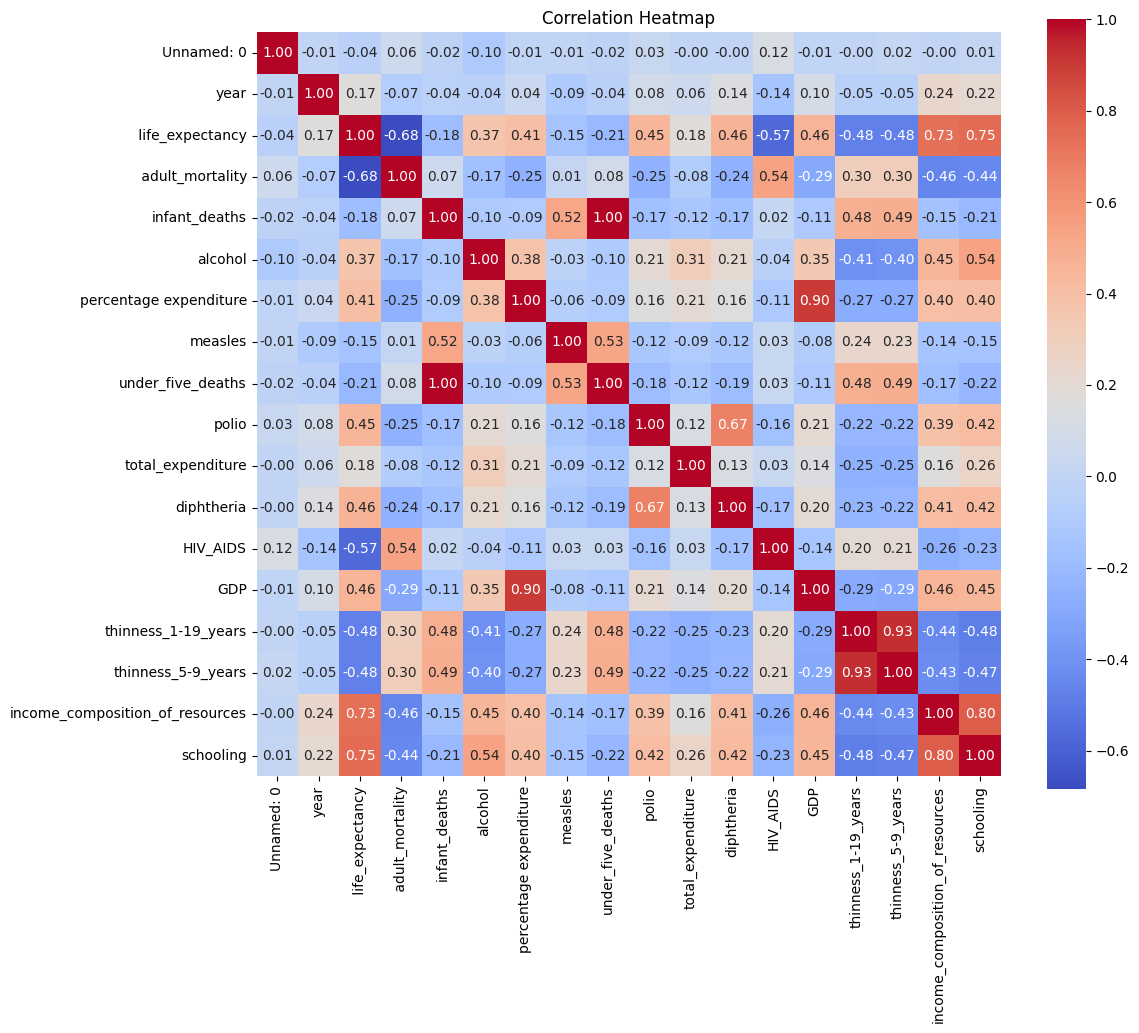

In [13]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
df = df.drop(['country', 'status'], axis=1)

## Training a Linear Regression Model

### X and y arrays

In [26]:
X=df.drop('infant_deaths', axis=1)
y=df['under_five_deaths']

In [27]:
print('X=', X.shape, '\ny=', y.shape)

X= (2480, 17) 
y= (2480,)


### Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
X_train.shape

(1736, 17)

In [30]:
X_test.shape

(744, 17)

## Linear Regression

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [33]:
model.coef_

array([-3.19696146e-15,  1.84054161e-14, -2.06238206e-14, -6.12959009e-16,
       -2.48958210e-14,  4.77076874e-15, -1.59752587e-18,  1.00000000e+00,
       -5.79834139e-16,  1.43346939e-15, -3.00986569e-16, -9.04050635e-16,
       -7.00319223e-16, -6.87831449e-16,  3.42740538e-16,  3.99255731e-15,
        5.47426141e-17])

In [35]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficients'])

,Coeficients
Unnamed: 0,-3.196961e-15
year,1.840542e-14
life_expectancy,-2.062382e-14
adult_mortality,-6.129590e-16
alcohol,-2.489582e-14
percentage expenditure,4.770769e-15
measles,-1.597526e-18
under_five_deaths,1.000000e+00
polio,-5.798341e-16
total_expenditure,1.433469e-15


## Predictions from our Model


In [36]:
y_pred = model.predict(X_test)

## Regression Evaluation Metrics

In [37]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [38]:
MAE

3.4727576348680426e-12

In [39]:
MSE

2.92672844164926e-23

In [40]:
RMSE

5.409924622071236e-12

In [41]:
df['under_five_deaths'].mean()

42.884274193548386

## Residual Histogram

In [42]:
test_residual = y_test - y_pred

In [45]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

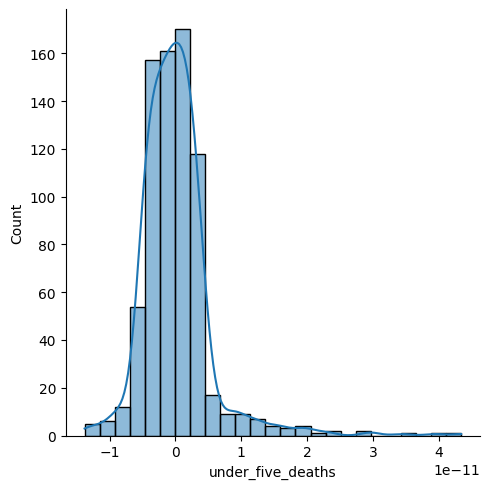

In [44]:
sns.displot(test_residual, bins=25, kde=True)

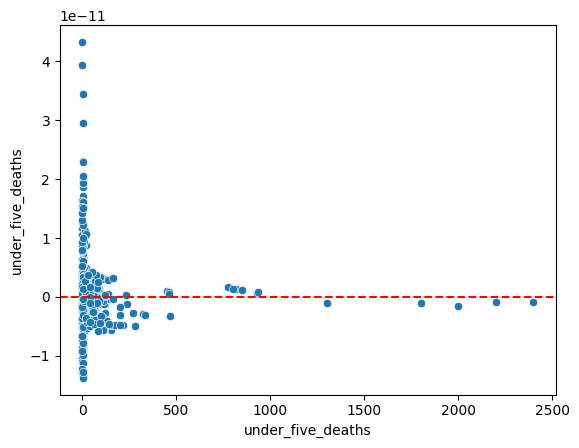

In [46]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')